##CIFAR10 Classification using Deep Neural Networks

###Theoretical Concepts

**Dataset Description:**

CIFAR-10 dataset consists of several images divided into following 10 classes -

Airplanes, Cars, Birds, Cats, Deer, Dogs, Frogs, Horses, Ships, Trucks

Consists of 60,000 (32x32 pixels) color images. 6000 images in each class

**Problem Statement:**

Train a deep learning classifier model such that a new image can be correctly classified into one of the 10 classes.

**What are Convolutional Neural Networks (CNN)?**

CNN is a type of artificial neural network that is specifically designed to process data that has a grid-like topology, such as images.

CNNs are able to learn to recognize patterns in images by using a technique called convolution. Convolution is a mathematical operation that takes two input arrays and produces an output array. In the case of CNNs, the input arrays are typically images, and the output array is a feature map.

Feature maps are used to represent the different features that are present in an image.

**Why featue maps are important?**

* Feature maps are important in CNNs because they allow the CNN to learn to recognize different features in an image. Feature maps are created by applying a convolution operation to the input image. The convolution operation takes the input image and produces an output array, called the feature map. The feature map represents the different features that are present in the input image.

* For example, a feature map might represent edges, corners, or textures. CNNs are able to learn to recognize these features by using a process called backpropagation. Backpropagation is a way of adjusting the weights of the connections between the neurons in a CNN so that the CNN is able to produce the correct output for a given input.

* Feature maps are important because they allow the CNN to learn to recognize different features in an image. This is important because it allows the CNN to be more accurate in its predictions. For example, a CNN that is able to recognize edges is more likely to be able to correctly identify an object in an image than a CNN that is not able to recognize edges.

* Feature maps are also important because they allow the CNN to be more efficient. This is because the CNN can learn to recognize features in an image without having to process the entire image. Instead, the CNN can focus on the parts of the image that are most likely to contain the features that it is looking for.


**Key Terminologies for CNN:**
* Convolution: A mathematical operation that takes two input arrays and produces an output array. In the case of CNNs, the input arrays are typically images, and the output array is a feature map.

* Pooling: A downsampling operation that reduces the size of the feature maps. Pooling is typically used to reduce the computational complexity of the CNN.

* Down Sampling: A process of reducing the size of an image or feature map. Down sampling is typically done by taking the average or max value of a group of pixels.

* Up Sampling: A process of increasing the size of an image or feature map. Up sampling is typically done by interpolating between the pixels in the image or feature map.

* Flattening: A process of converting a multidimensional array into a one-dimensional array. Flattening is typically done to prepare the output of the CNN for a fully connected layer.

* Filter: A small matrix that is used to convolve with an input image. The filter is used to extract features from the image.

* Kernel: A synonym for filter.

* Activation Function: A function that is applied to the output of a neuron in a CNN. The activation function is used to introduce non-linearity into the CNN. Makes the feature map sparse, in general introduces a little bit of challenge while training the model. Highlight important features and help improve model performance.

* Dropout: A technique used to prevent overfitting by randomly dropping out some of the neurons during training.

Use this link for visualization of kernel working - https://setosa.io/ev/image-kernels/

Use this link for visualization of CNN on Digits - https://adamharley.com/nn_vis/

###Code

In [92]:
#IMPORT LIBRARIES/DATASETS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [93]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [94]:
X_train.shape

(50000, 32, 32, 3)

In [95]:
y_train.shape

(50000, 1)

In [96]:
X_test.shape

(10000, 32, 32, 3)

In [97]:
y_test.shape

(10000, 1)

Class: 9


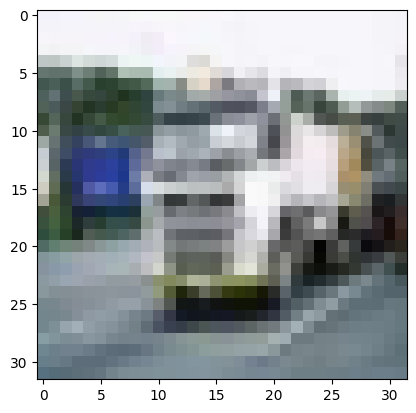

In [98]:
#VISUALIZE DATA
idx = 1000
plt.imshow(X_train[idx])
print("Class:", y_train[idx][0])

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


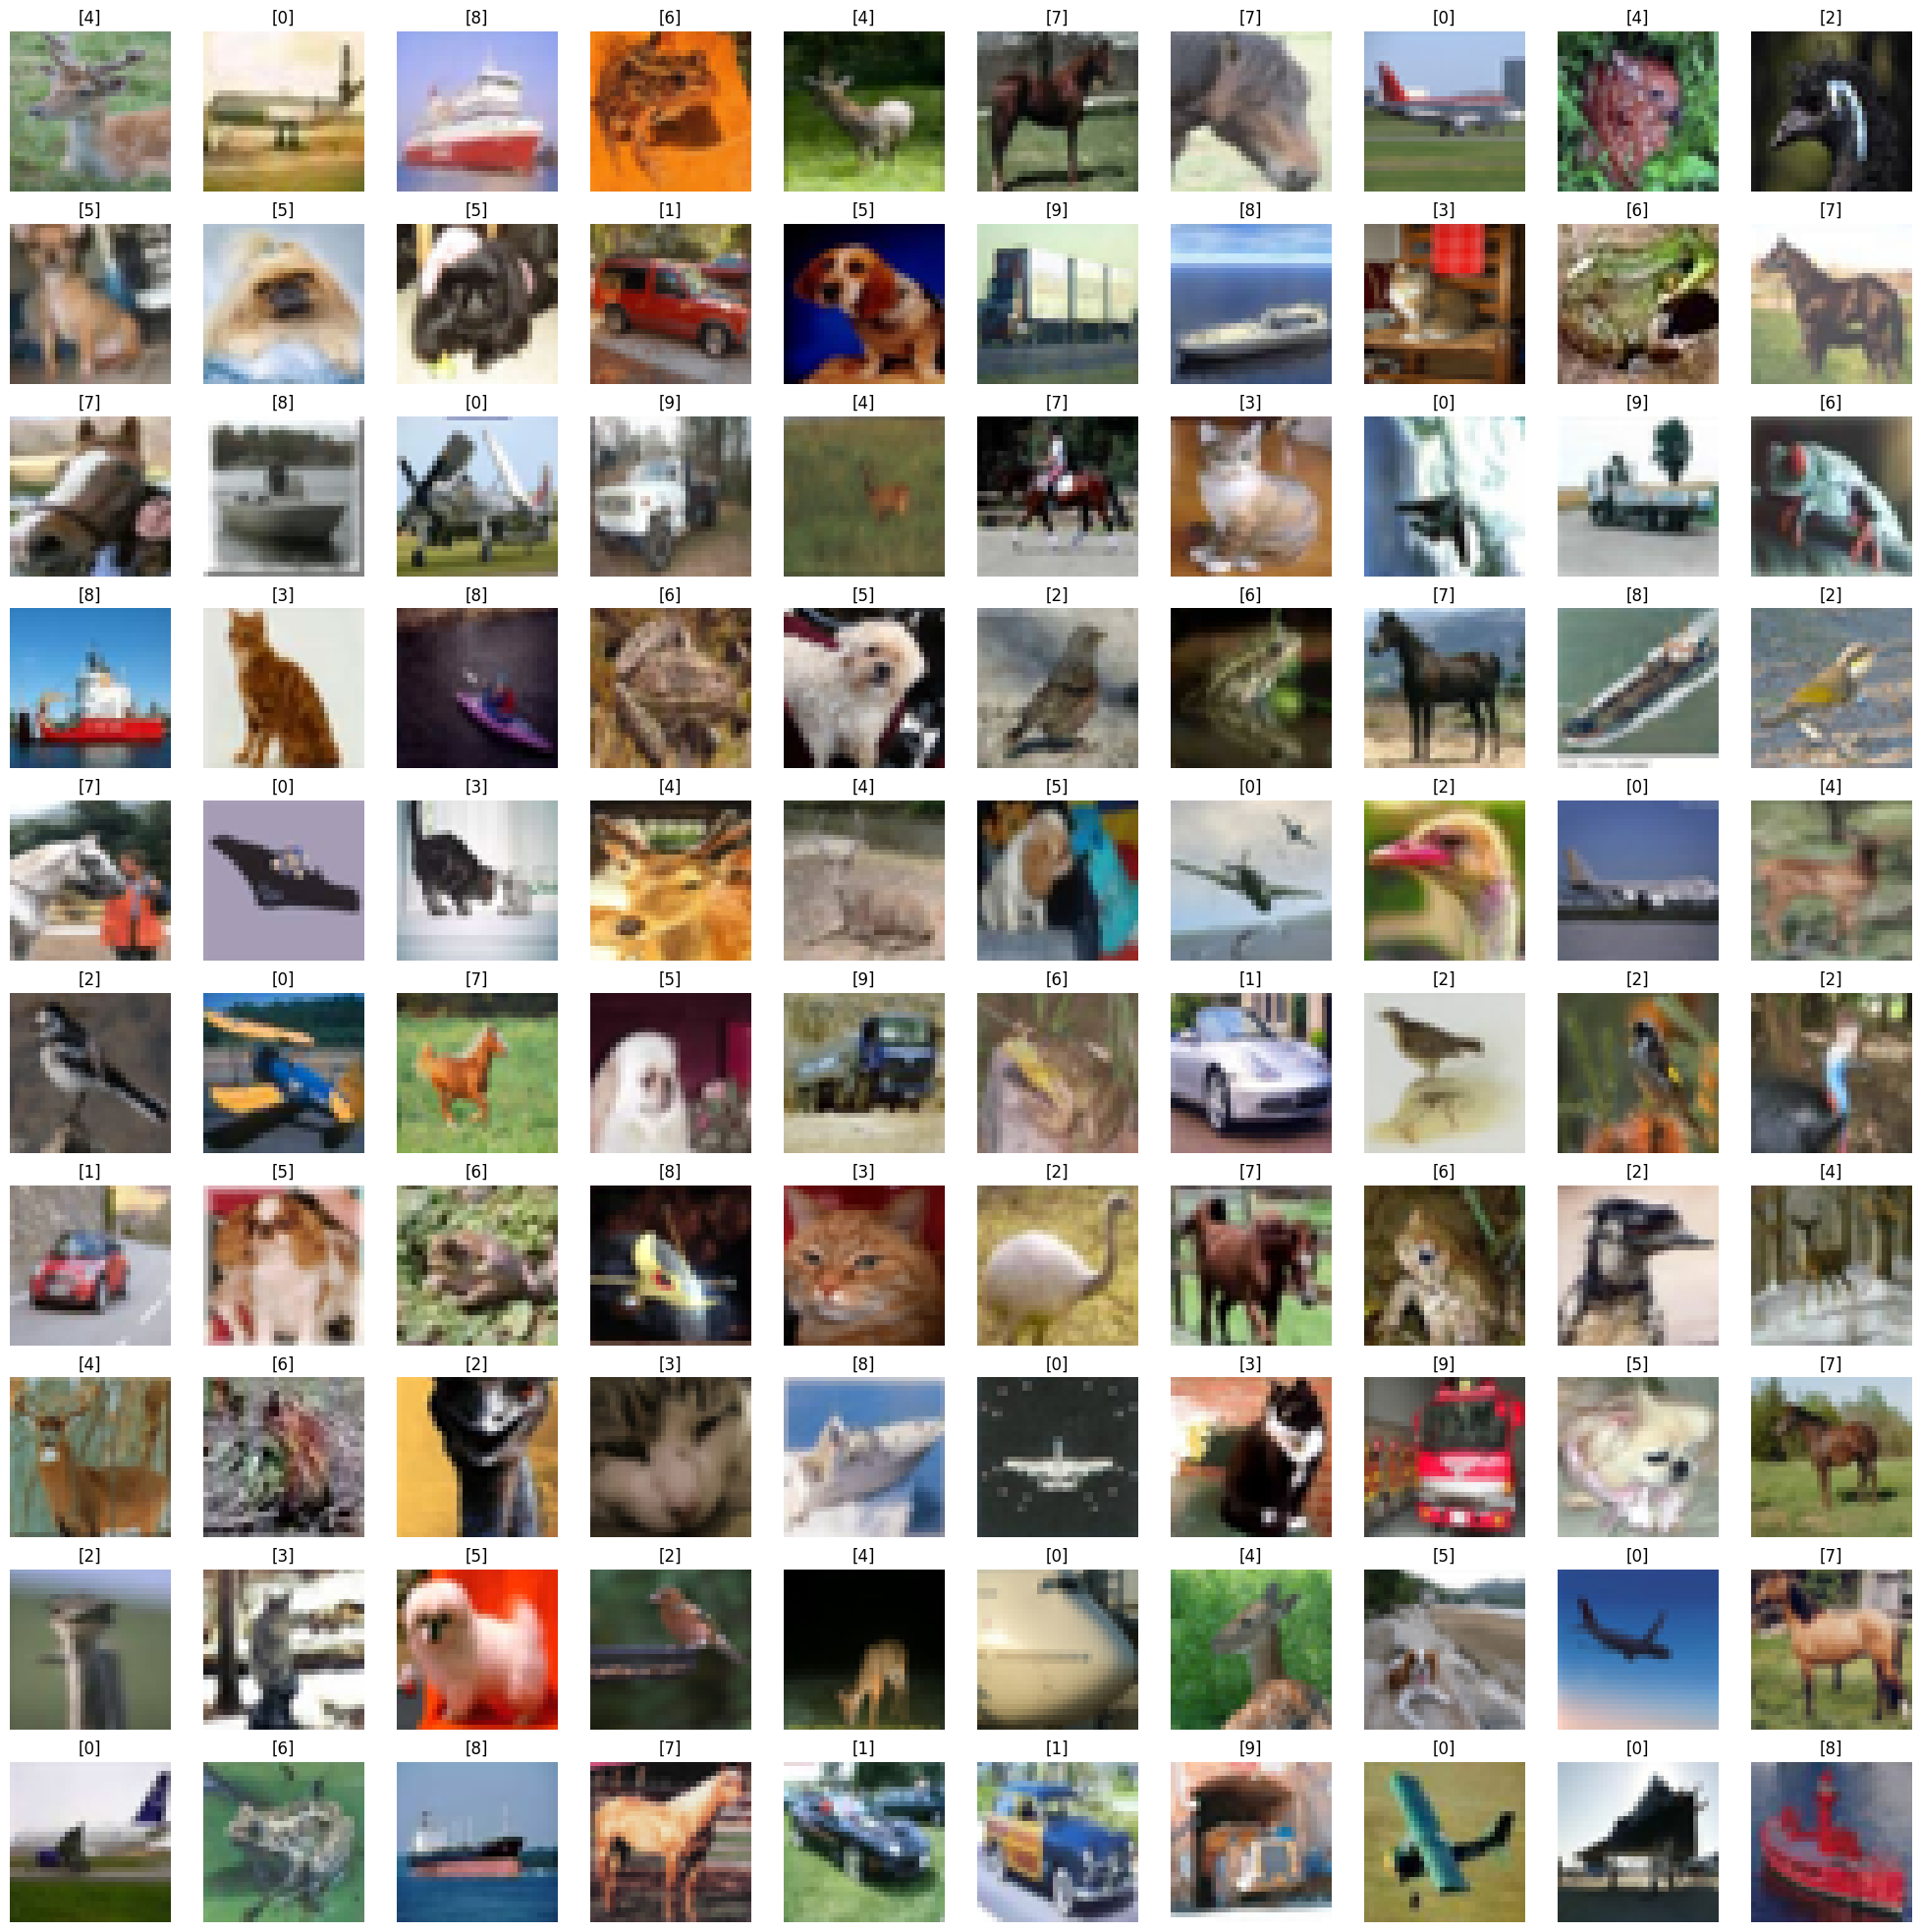

In [99]:
W_grid = 10
L_grid = 10

fig, ax = plt.subplots(L_grid, W_grid, figsize=(25,25))
ax = ax.ravel()

n_train = len(X_train)

for i in np.arange(0, L_grid * W_grid):
  index = np.random.randint(0, n_train) #pick a random index
  ax[i].imshow(X_train[index])
  ax[i].set_title(y_train[index])
  ax[i].axis('off')

In [100]:
#DATA PREPARATION

#Need the data infloat format
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [101]:
import keras
n_categ = 10

#Converting y values from decimal to binary format.
#In our CNN we'll have 10 outputs. Thus we convert the number to categories
y_train = keras.utils.to_categorical(y_train, n_categ)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [102]:
len(list(y_train[0]))

10

In [103]:
y_test = keras.utils.to_categorical(y_test, n_categ)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [104]:
#Normalize this pixel values in Input data. The conversion to float done before hand comes handy here.
#Makes values between 0 to 1
X_train = X_train / 255
X_test = X_test / 255

In [105]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [106]:
inp_shape = X_train.shape[1:] #For this case gets (32, 32, 3)
inp_shape

(32, 32, 3)

In [107]:
#TRAIN THE MODEL

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [108]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(10, activation='softmax')) #Softmax is ideal as I want output to be 0 or 1


cnn_model_SGD = cnn_model
cnn_model_Adam = cnn_model

In [110]:
from keras.optimizers import RMSprop
#using RMSprop optimizer
cnn_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [19]:
history_rmsprop = cnn_model.fit(X_train, y_train, batch_size=64, epochs=50, shuffle = True)

Epoch 1/50
782/782 [==============================] - 19s 11ms/step - loss: 1.7254 - accuracy: 0.3657
Epoch 2/50
782/782 [==============================] - 8s 10ms/step - loss: 1.2397 - accuracy: 0.5570
Epoch 3/50
782/782 [==============================] - 8s 10ms/step - loss: 1.0288 - accuracy: 0.6390
Epoch 4/50
782/782 [==============================] - 8s 10ms/step - loss: 0.9007 - accuracy: 0.6841
Epoch 5/50
782/782 [==============================] - 8s 10ms/step - loss: 0.8115 - accuracy: 0.7175
Epoch 6/50
782/782 [==============================] - 8s 10ms/step - loss: 0.7498 - accuracy: 0.7406
Epoch 7/50
782/782 [==============================] - 8s 10ms/step - loss: 0.7061 - accuracy: 0.7595
Epoch 8/50
782/782 [==============================] - 8s 11ms/step - loss: 0.6850 - accuracy: 0.7649
Epoch 9/50
782/782 [==============================] - 9s 11ms/step - loss: 0.6678 - accuracy: 0.7740
Epoch 10/50
782/782 [==============================] - 8s 10ms/step - loss: 0.6551 - accur

In [20]:
#EVALUATE THE MODEL
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 2s 4ms/step - loss: 1.0360 - accuracy: 0.6473
Test Accuracy: 0.6473000049591064


In [21]:
pred_classes = cnn_model.predict(X_test)
pred_classes =np.argmax(pred_classes,axis=1)
pred_classes

313/313 [==============================] - 1s 2ms/step


array([3, 8, 8, ..., 5, 1, 7])

In [22]:
y_test_class = y_test.argmax(1) #Returns back the binary to decimal values
y_test_class

array([3, 8, 8, ..., 5, 1, 7])

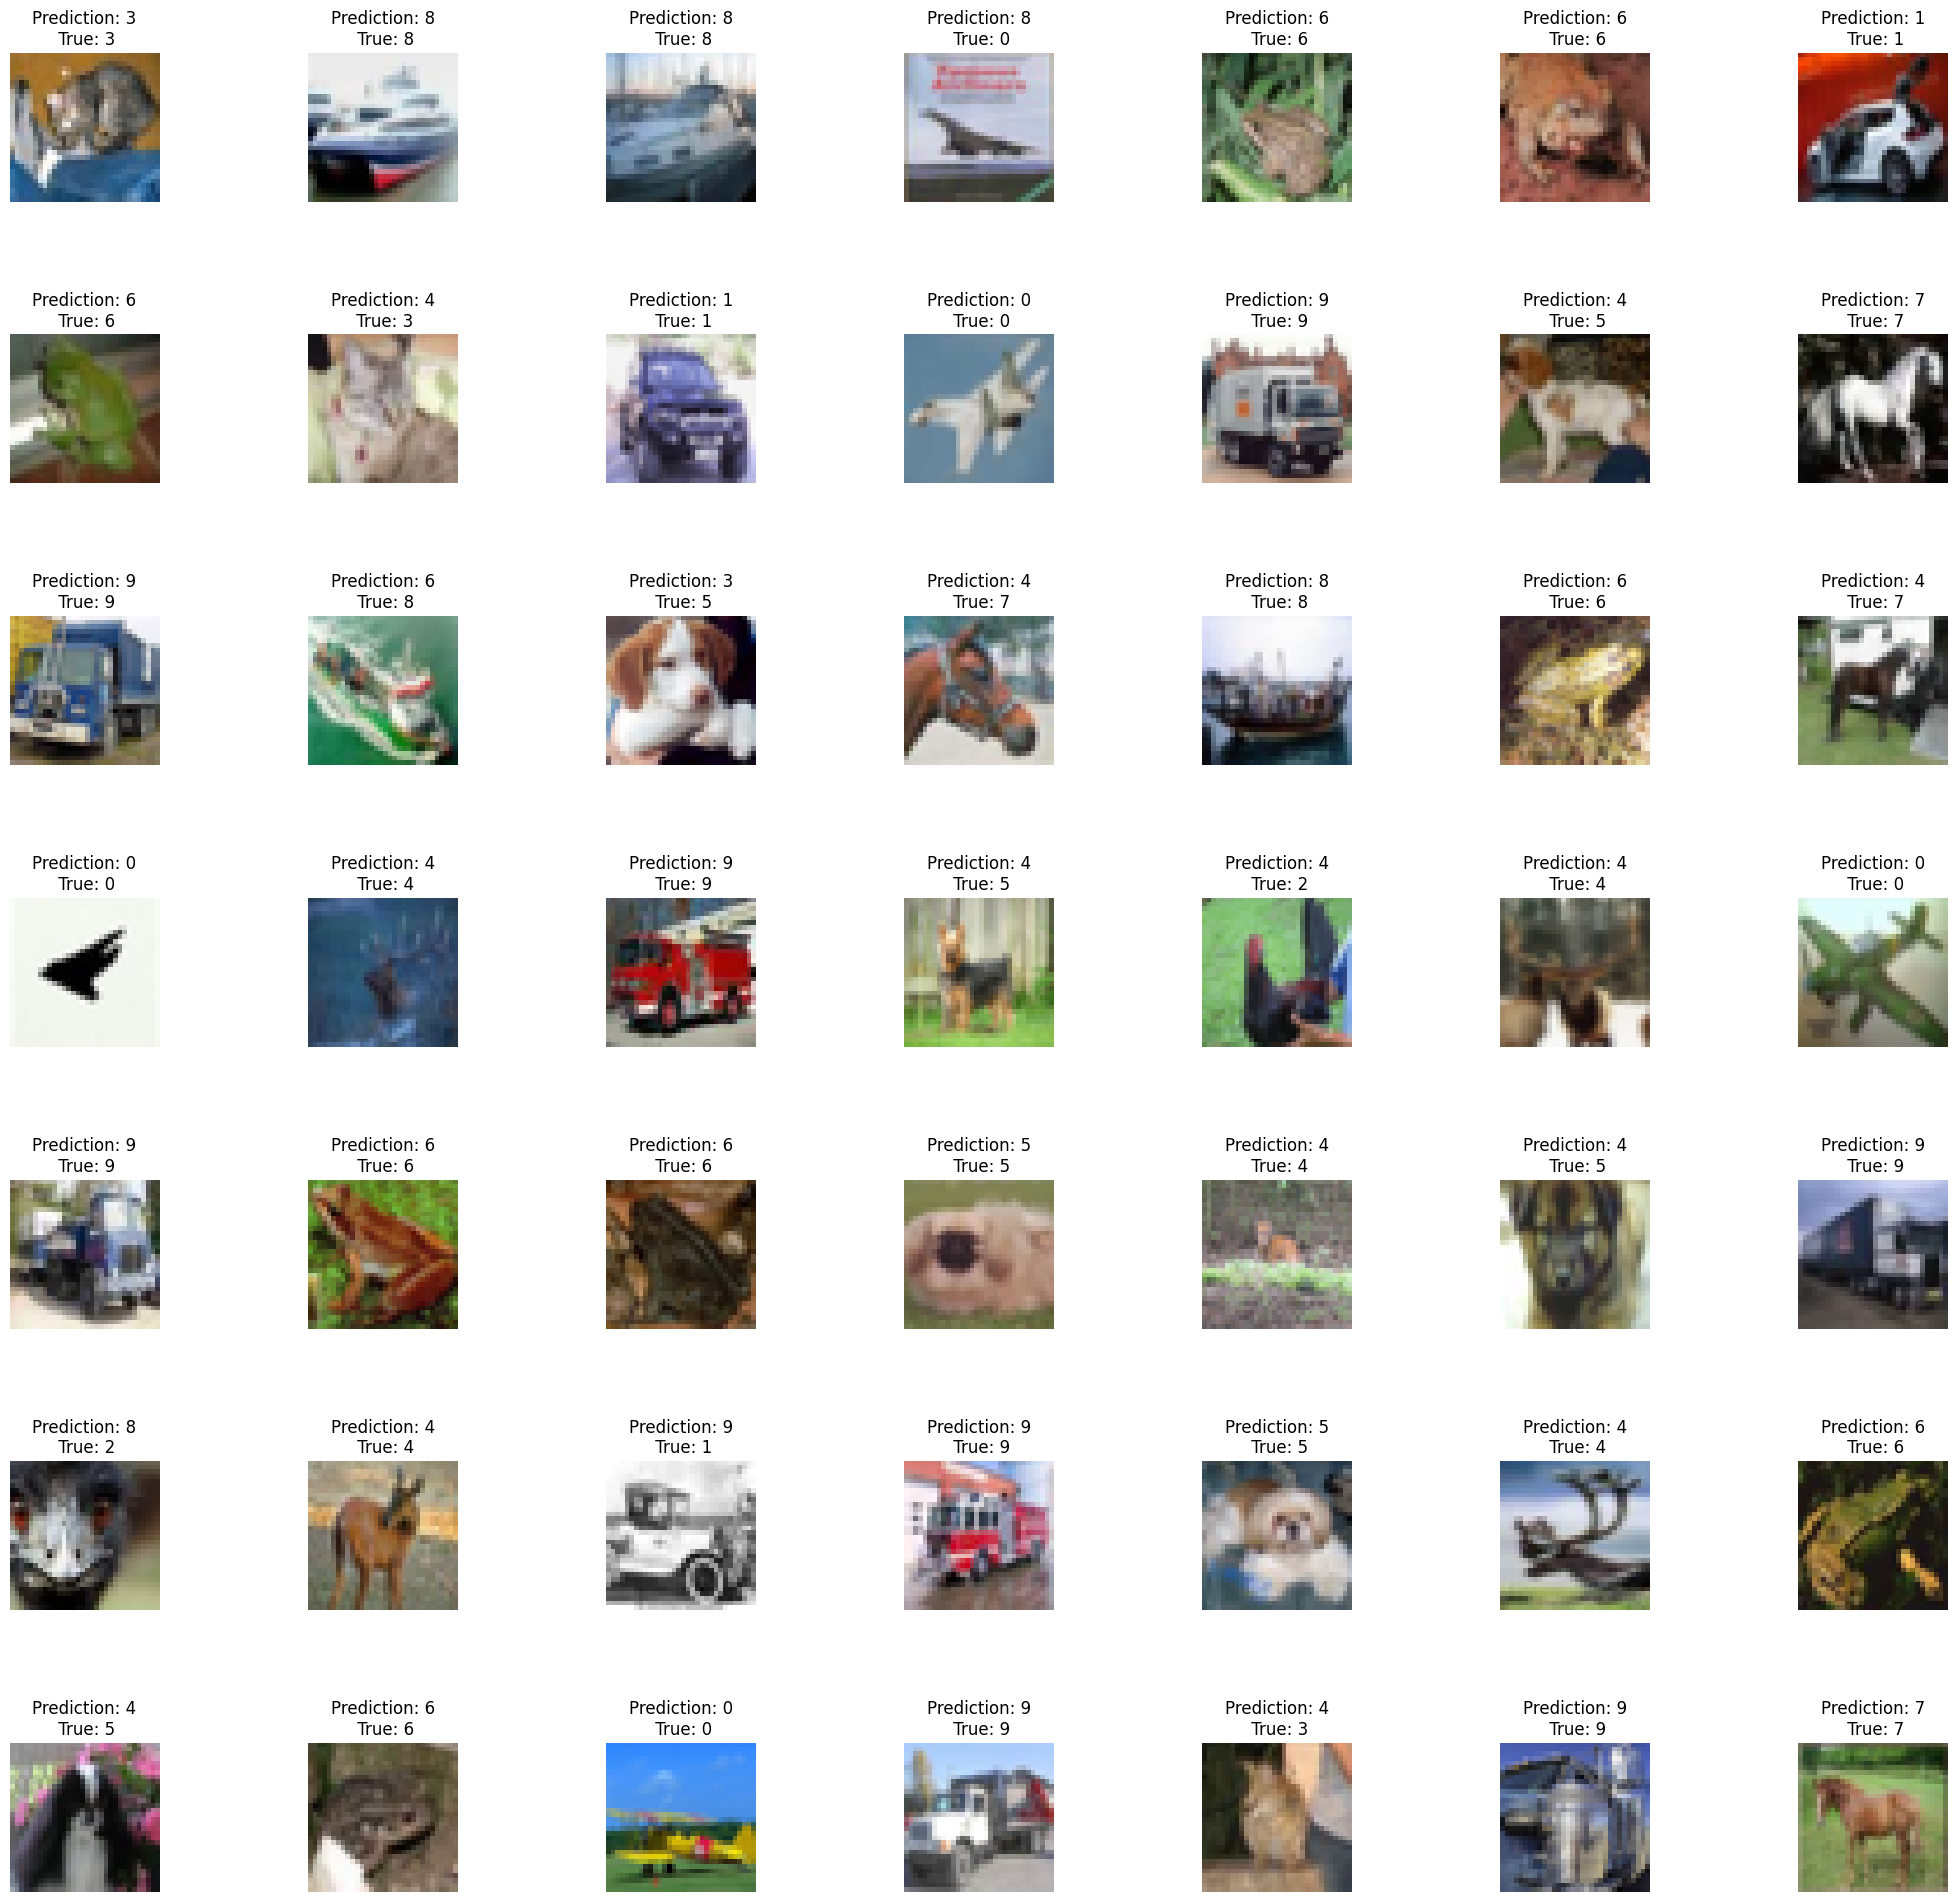

In [23]:
L = 7
W = 7

fig, ax = plt.subplots(L, W, figsize=(25,25))
ax = ax.ravel()
for i in np.arange(0, L * W):
  ax[i].imshow(X_test[i])
  ax[i].set_title('Prediction: {}\n True: {}'.format(pred_classes[i], y_test_class[i]))
  ax[i].axis('off')

plt.subplots_adjust(wspace = 1)

<Axes: >

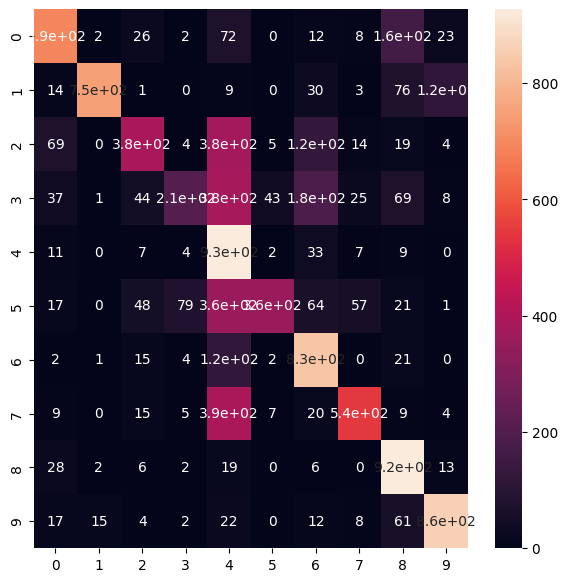

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_class, pred_classes)
plt.figure(figsize = (7,7))
sns.heatmap(cm, annot=True)

In the above heatmap
Rows = predicted by model
Columns = Actual Value

So, for e.g

Cell of ROW 1 & COL 4 : Says that 5 values had class label 4 but were classified as label 1. So the lower this value is the better the model performed.

We need higher values in the cells where the Row label and column label are same. This means the predicted label matched the actual label.

And we need less or zero in the cells where the row label is not equal to the col label. Because we want the misclassification to be less.

In [29]:
#Change the model optimized to Stochastic Gradient Descent (SGD) and test again.
from keras.optimizers import SGD
opt = SGD(learning_rate=0.001)
cnn_model_SGD.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd = cnn_model_SGD.fit(X_train, y_train, batch_size=64, epochs=50, shuffle = True)

Epoch 1/20
782/782 [==============================] - 9s 10ms/step - loss: 2.2832 - accuracy: 0.1415
Epoch 2/20
782/782 [==============================] - 8s 10ms/step - loss: 2.2688 - accuracy: 0.1460
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 2.2439 - accuracy: 0.1625
Epoch 4/20
782/782 [==============================] - 8s 10ms/step - loss: 2.2044 - accuracy: 0.1834
Epoch 5/20
782/782 [==============================] - 7s 9ms/step - loss: 2.1347 - accuracy: 0.2177
Epoch 6/20
782/782 [==============================] - 8s 10ms/step - loss: 2.0661 - accuracy: 0.2388
Epoch 7/20
782/782 [==============================] - 8s 11ms/step - loss: 2.0370 - accuracy: 0.2504
Epoch 8/20
782/782 [==============================] - 7s 9ms/step - loss: 2.0131 - accuracy: 0.2621
Epoch 9/20
782/782 [==============================] - 8s 10ms/step - loss: 1.9917 - accuracy: 0.2701
Epoch 10/20
782/782 [==============================] - 7s 9ms/step - loss: 1.9731 - accuracy: 

In [30]:
evaluation = cnn_model_SGD.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 1.6752 - accuracy: 0.4005
Test Accuracy: 0.40049999952316284


In [31]:
pred_classes = cnn_model_SGD.predict(X_test)
pred_classes =np.argmax(pred_classes,axis=1)
pred_classes

313/313 [==============================] - 1s 2ms/step


array([3, 1, 8, ..., 5, 5, 7])

In [32]:
y_test_dec = y_test.argmax(1) #Returns back the binary to decimal values
y_test_dec

array([3, 8, 8, ..., 5, 1, 7])

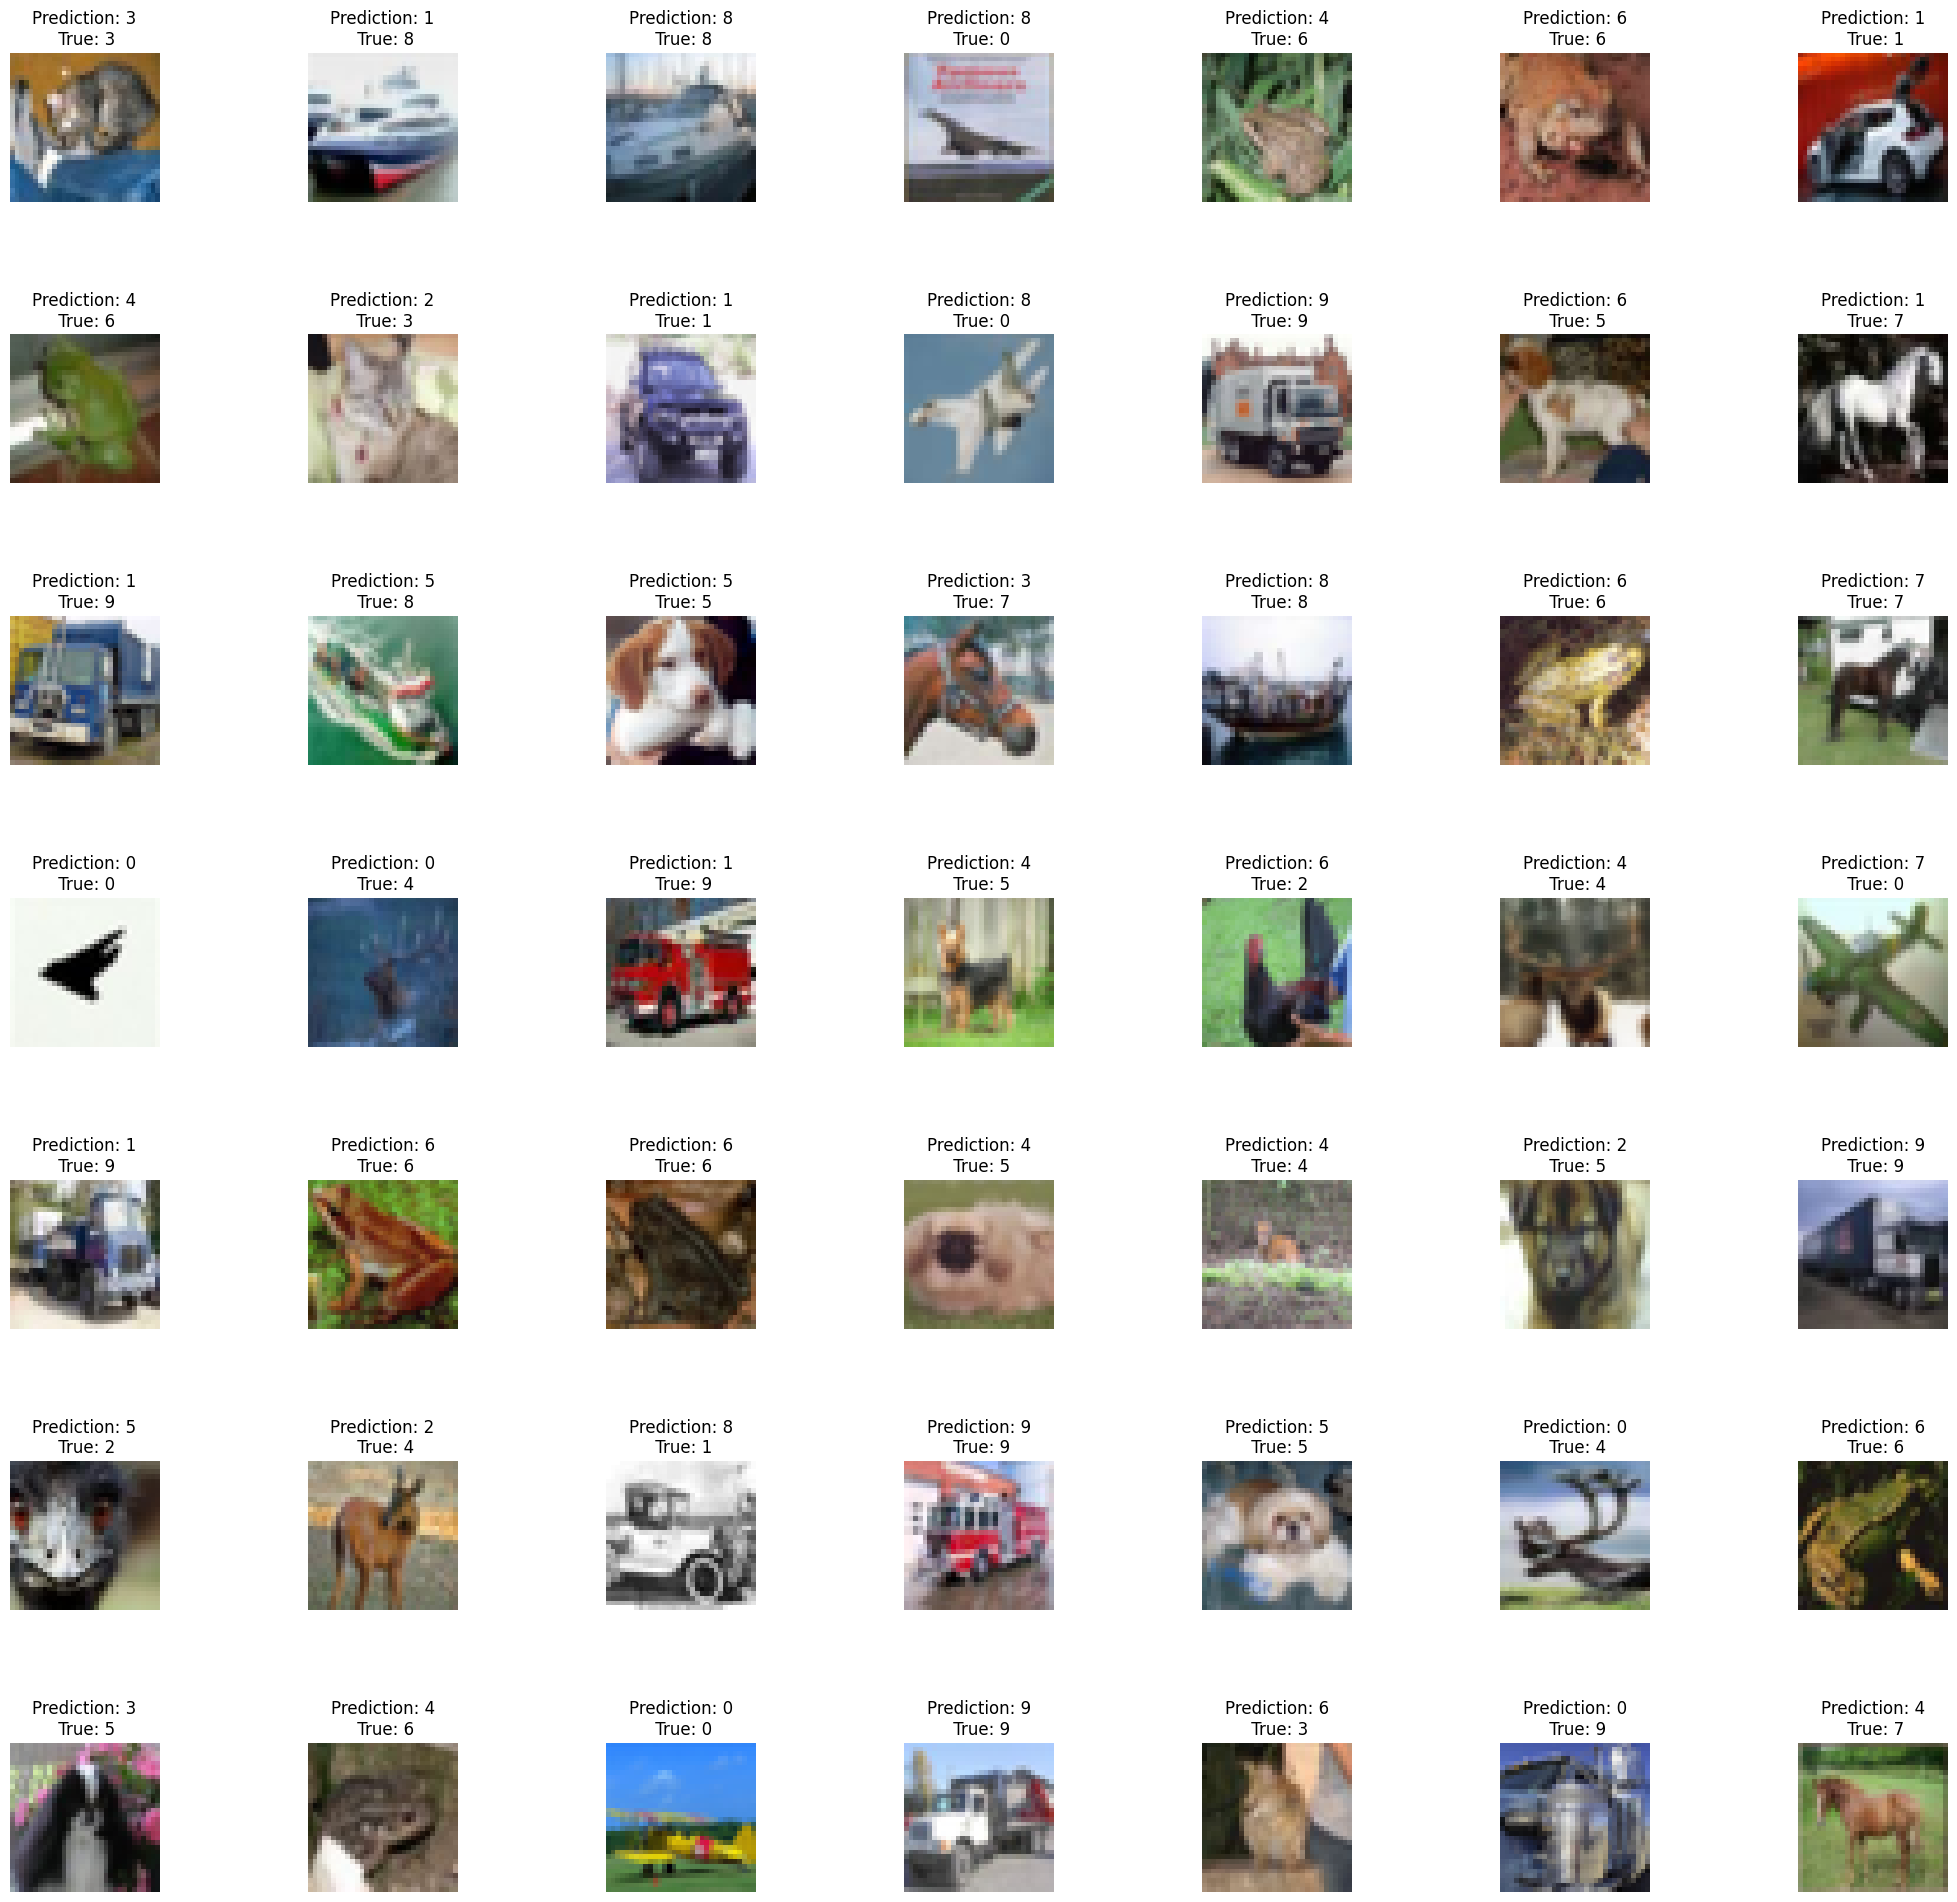

In [33]:
L = 7
W = 7

fig, ax = plt.subplots(L, W, figsize=(25,25))
ax = ax.ravel()
for i in np.arange(0, L * W):
  ax[i].imshow(X_test[i])
  ax[i].set_title('Prediction: {}\n True: {}'.format(pred_classes[i], y_test_class[i]))
  ax[i].axis('off')

plt.subplots_adjust(wspace = 1)

<Axes: >

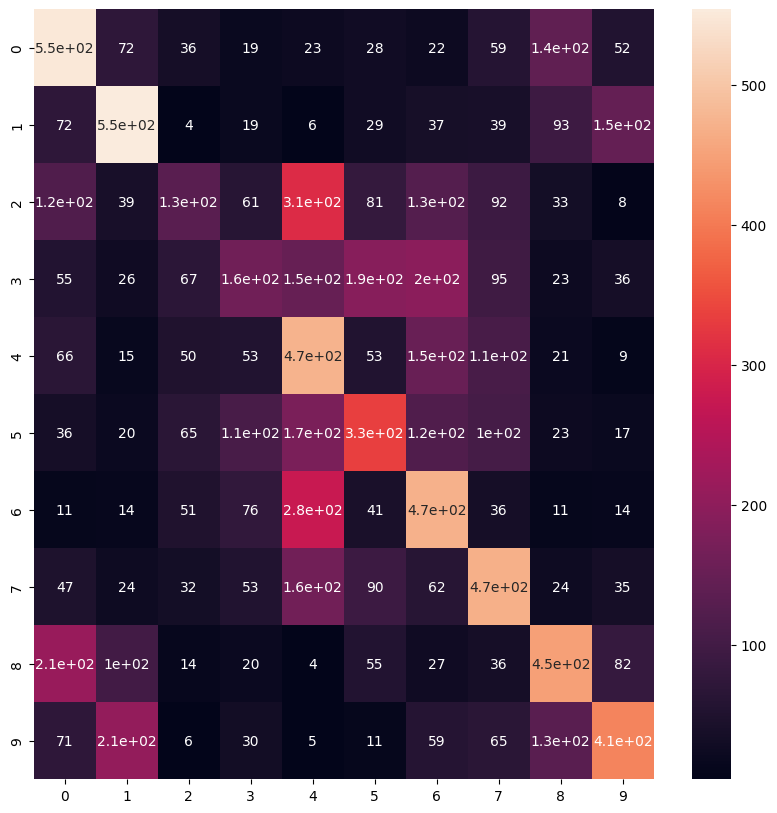

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_class, pred_classes)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)

In [35]:
#Change the model optimized to Stochastic Gradient Descent (SGD) and test again.
opt = Adam(learning_rate=0.001)
cnn_model_Adam.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = cnn_model_Adam.fit(X_train, y_train, batch_size=64, epochs=50, shuffle = True)

Epoch 1/50
782/782 [==============================] - 8s 9ms/step - loss: 1.5675 - accuracy: 0.4270
Epoch 2/50
782/782 [==============================] - 8s 10ms/step - loss: 1.1517 - accuracy: 0.5918
Epoch 3/50
782/782 [==============================] - 8s 10ms/step - loss: 0.9421 - accuracy: 0.6687
Epoch 4/50
782/782 [==============================] - 7s 9ms/step - loss: 0.8171 - accuracy: 0.7116
Epoch 5/50
782/782 [==============================] - 8s 10ms/step - loss: 0.7297 - accuracy: 0.7439
Epoch 6/50
782/782 [==============================] - 7s 9ms/step - loss: 0.6677 - accuracy: 0.7678
Epoch 7/50
782/782 [==============================] - 8s 10ms/step - loss: 0.6089 - accuracy: 0.7875
Epoch 8/50
782/782 [==============================] - 8s 10ms/step - loss: 0.5723 - accuracy: 0.7991
Epoch 9/50
782/782 [==============================] - 7s 9ms/step - loss: 0.5342 - accuracy: 0.8137
Epoch 10/50
782/782 [==============================] - 8s 10ms/step - loss: 0.5074 - accuracy: 

In [36]:
evaluation = cnn_model_Adam.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.7341 - accuracy: 0.8107
Test Accuracy: 0.810699999332428


In [37]:
pred_classes = cnn_model_Adam.predict(X_test)
pred_classes =np.argmax(pred_classes,axis=1)
pred_classes

313/313 [==============================] - 1s 2ms/step


array([3, 8, 0, ..., 5, 1, 7])

In [38]:
y_test_dec = y_test.argmax(1) #Returns back the binary to decimal values
y_test_dec

array([3, 8, 8, ..., 5, 1, 7])

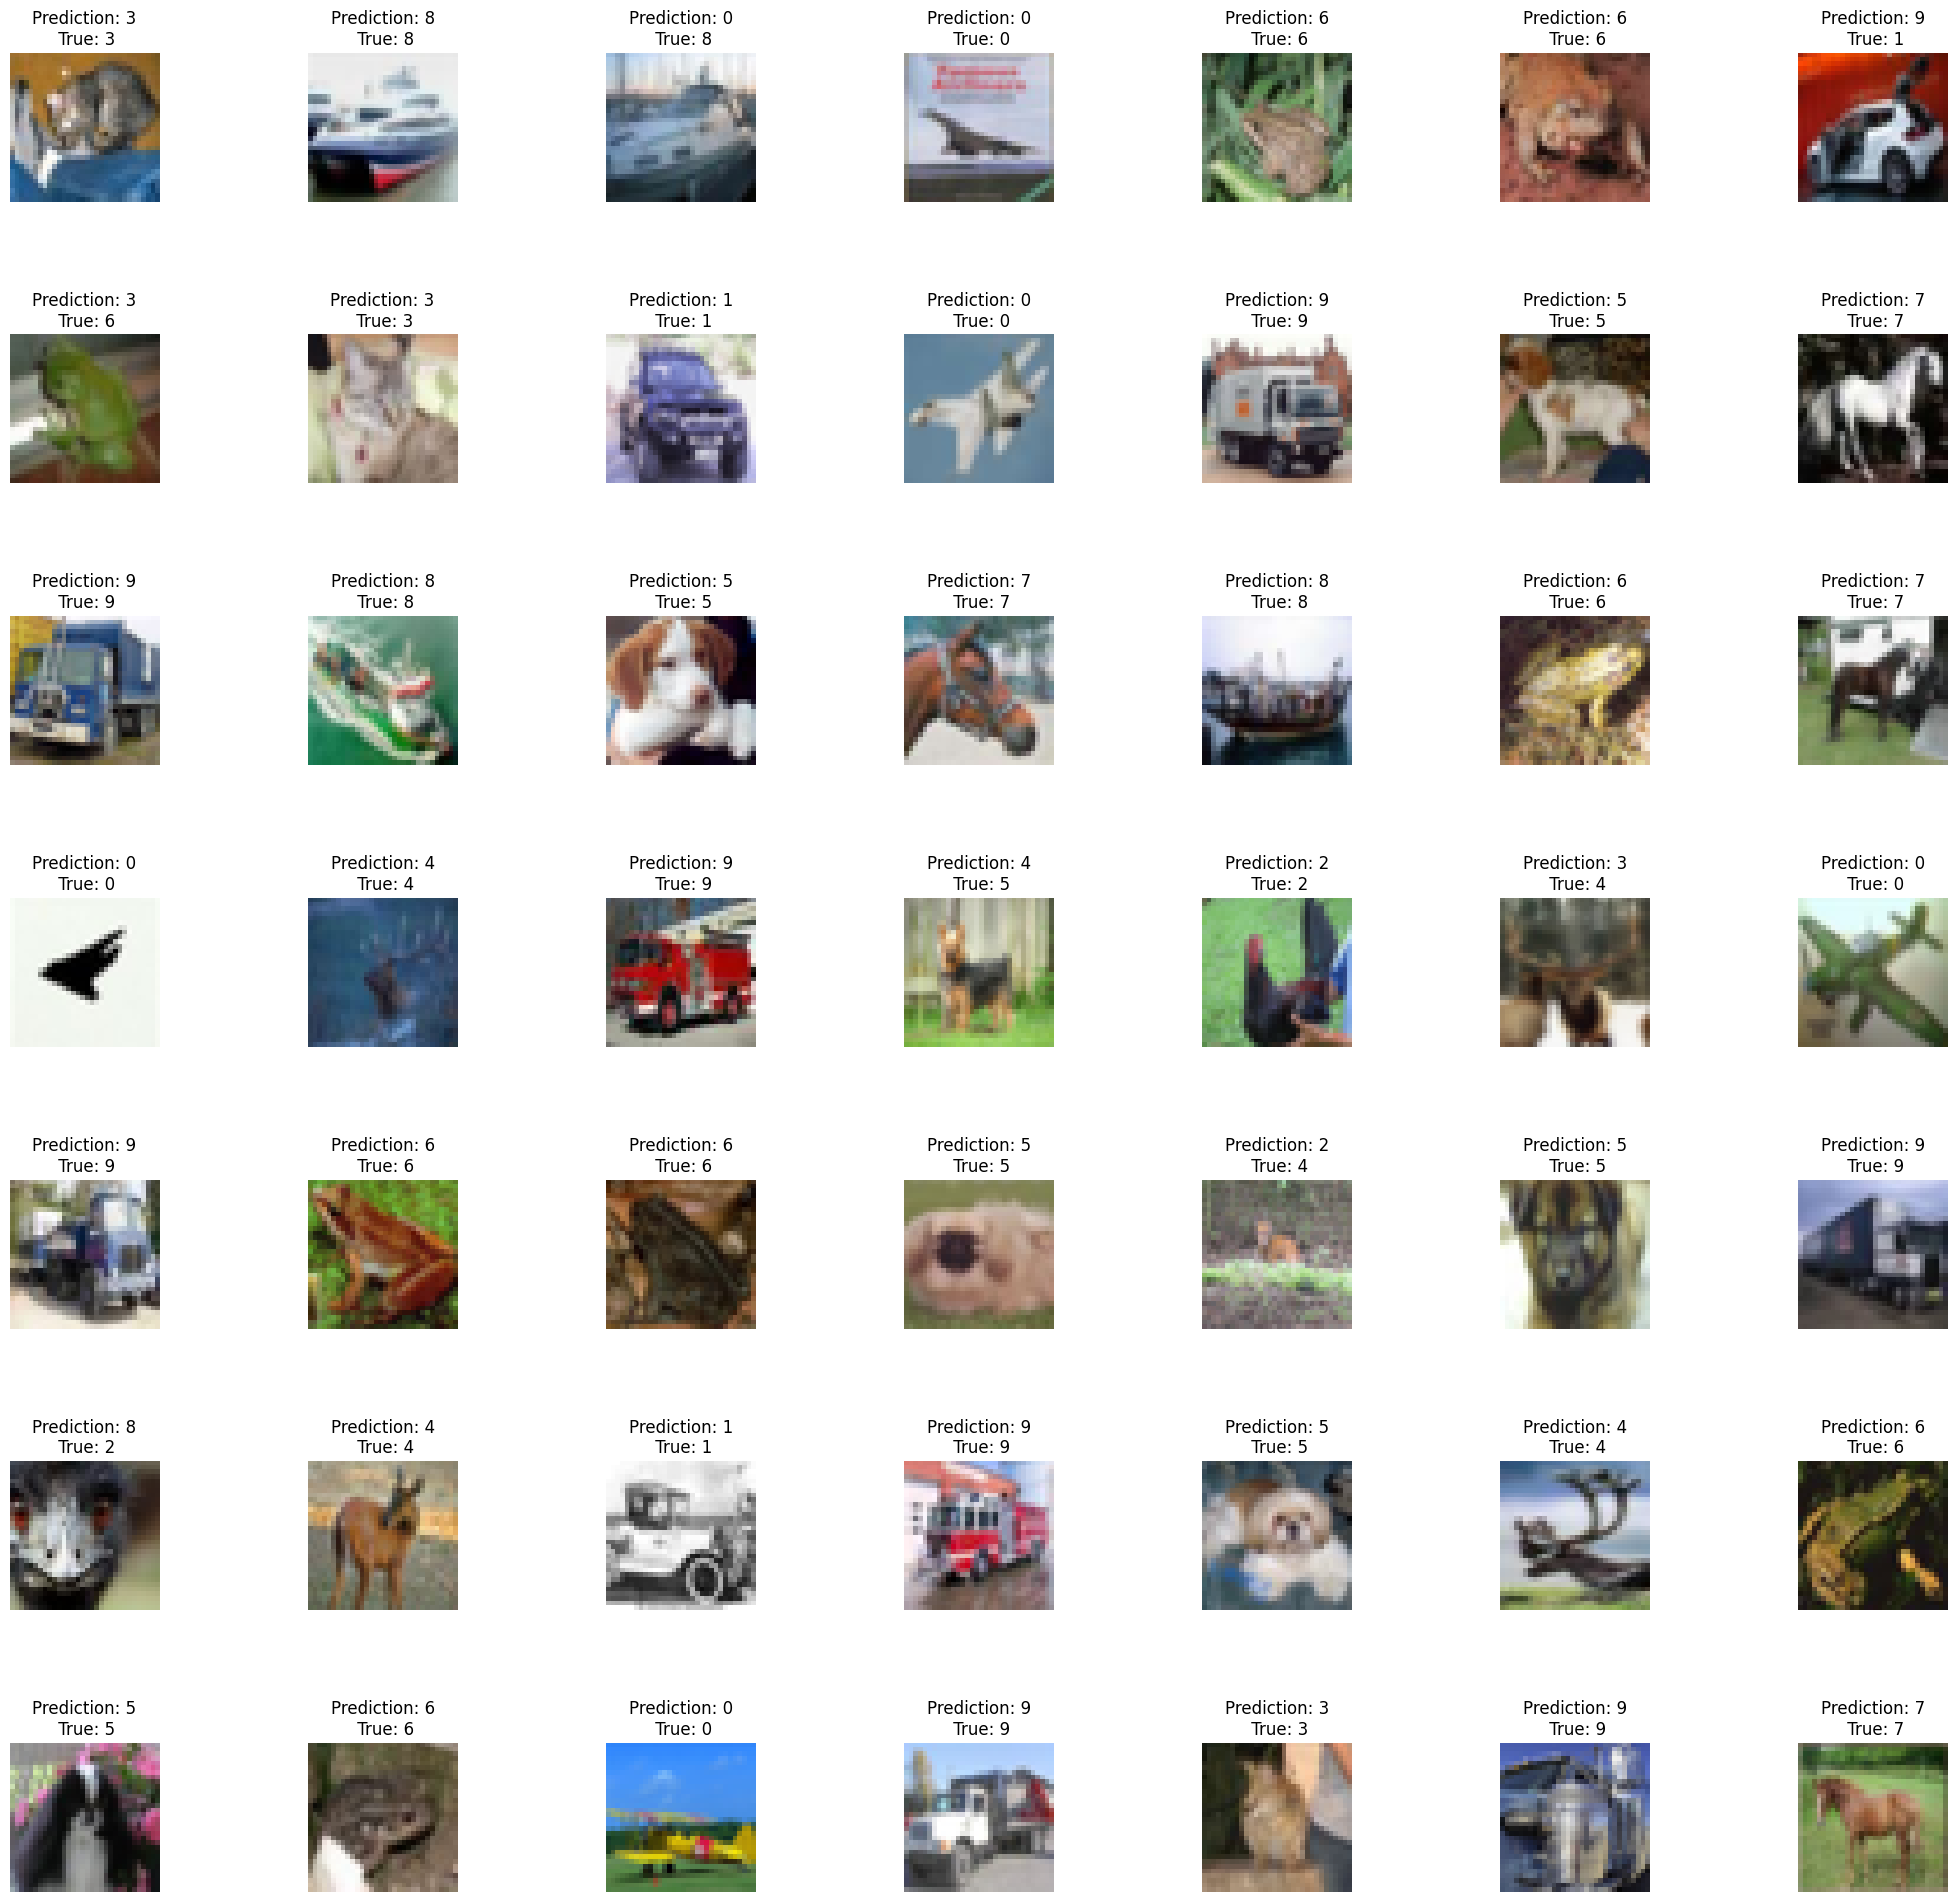

In [39]:
L = 7
W = 7

fig, ax = plt.subplots(L, W, figsize=(25,25))
ax = ax.ravel()
for i in np.arange(0, L * W):
  ax[i].imshow(X_test[i])
  ax[i].set_title('Prediction: {}\n True: {}'.format(pred_classes[i], y_test_class[i]))
  ax[i].axis('off')

plt.subplots_adjust(wspace = 1)

<Axes: >

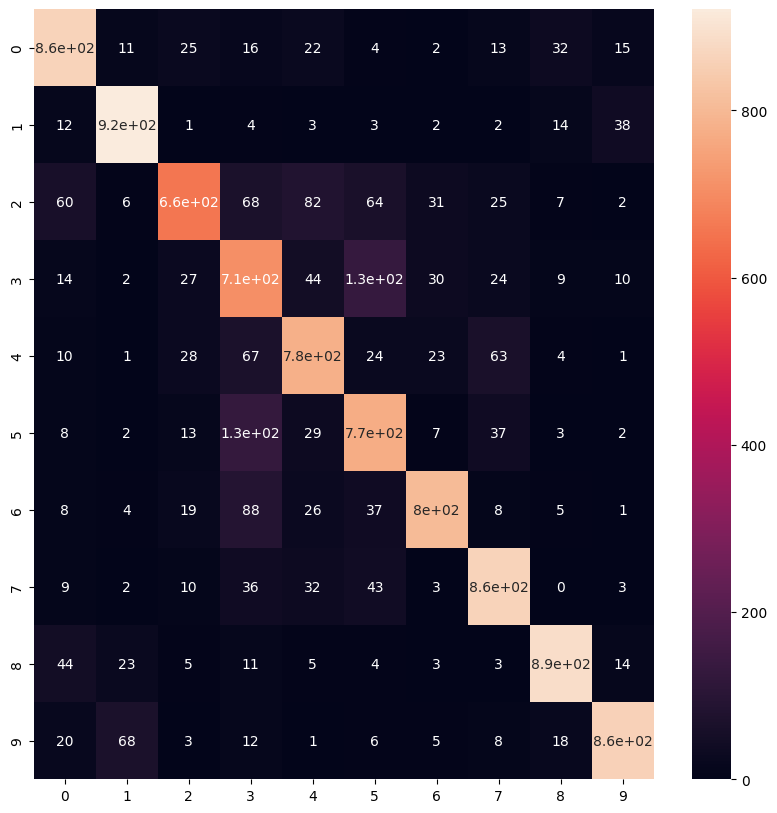

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_class, pred_classes)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)

In [41]:
#SAVING THE MODEL
cnn_model.save('keras_cifar10_trained_model.h5')

DATA AUGMENTATION for CIFAR-10 DATASET

Data augmentation is a technique in machine learning used to artificially increase the amount of data by generating new data points from existing data. This is done by applying random transformations to the existing data, such as flipping, rotating, or cropping images, or changing the order of words in a sentence.

Data augmentation is used to improve the performance of machine learning models by reducing overfitting. Overfitting occurs when a model learns the training data too well and is unable to generalize to new data. Data augmentation helps to prevent overfitting by providing the model with more data to learn from.

There are many different data augmentation techniques that can be used for image classification. Some of the most common techniques include:

    Flipping: This involves flipping the image horizontally or vertically.
    Rotating: This involves rotating the image by a certain angle.
    Cropping: This involves cropping the image to a smaller size.
    Adding noise: This involves adding random noise to the image.
    Changing the brightness: This involves changing the brightness of the image.
    Changing the contrast: This involves changing the contrast of the image.

The choice of data augmentation techniques depends on the type of data being used and the task being performed. For example, flipping and rotating are often used for image classification tasks, while adding noise is often used for natural language processing tasks.

Here are some of the benefits of using data augmentation in image classification:

    It can help to reduce overfitting.
    It can improve the performance of machine learning models.
    It can make machine learning models more robust to noise.
    It can make machine learning models more generalizable to new data.

Here are some of the challenges of using data augmentation in image classification:

    It can be time-consuming to generate augmented data.
    It can be difficult to choose the right data augmentation techniques.
    It can be difficult to evaluate the effectiveness of data augmentation.


In [113]:
#AUGMENTING THE CIFAR-10 DATA
X_train.shape

(50000, 32, 32, 3)

In [114]:
n = 8
X_train_sample = X_train[:n]

In [115]:
X_train_sample.shape

(8, 32, 32, 3)

In [116]:
from keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(rotation_range=90)
datagen_train.fit(X_train_sample)

In [117]:
datagen_train_samples = datagen_train.flow(X_train_sample, batch_size = n)

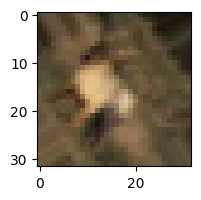

In [118]:
from PIL import Image
fig = plt.figure(figsize = (20,2))
plt.imshow(datagen_train_samples[0][0])

In [119]:
#TRAIN THE MODEL ON AUGMENTED DATA
datagen = ImageDataGenerator(rotation_range=90,
                             width_shift_range=0.1,
                             horizontal_flip= True,
                             vertical_flip = True)

In [120]:
datagen.fit(X_train)

In [121]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])
cnn_model_SGD.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model_Adam.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [123]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs=20, shuffle=True)

Epoch 1/20
   4/1563 [..............................] - ETA: 32s - loss: 2.3036 - accuracy: 0.0469 

<ipython-input-123-118a75f06226>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs=20, shuffle=True)


1563/1563 [==============================] - 38s 24ms/step - loss: 2.3028 - accuracy: 0.1001
Epoch 2/20
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3028 - accuracy: 0.0978
Epoch 3/20
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3028 - accuracy: 0.0974
Epoch 4/20
1563/1563 [==============================] - 37s 24ms/step - loss: 2.3028 - accuracy: 0.0975
Epoch 5/20
1563/1563 [==============================] - 37s 24ms/step - loss: 2.3028 - accuracy: 0.0983
Epoch 6/20
1563/1563 [==============================] - 37s 24ms/step - loss: 2.3028 - accuracy: 0.0971
Epoch 7/20
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3028 - accuracy: 0.0997
Epoch 8/20
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3028 - accuracy: 0.0977
Epoch 9/20
1563/1563 [==============================] - 37s 24ms/step - loss: 2.3028 - accuracy: 0.0991
Epoch 10/20
1563/1563 [==============================] - 37s 24ms/step - lo

In [124]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1000
Test Accuracy: 0.10000000149011612


In [125]:
cnn_model_SGD.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs=20, shuffle=True)

Epoch 1/20
   1/1563 [..............................] - ETA: 1:25 - loss: 2.3029 - accuracy: 0.0938

<ipython-input-125-44770b2148e7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model_SGD.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs=20, shuffle=True)


1563/1563 [==============================] - 38s 24ms/step - loss: 2.3028 - accuracy: 0.0976
Epoch 2/20
1563/1563 [==============================] - 37s 24ms/step - loss: 2.3028 - accuracy: 0.0997
Epoch 3/20
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3028 - accuracy: 0.0967
Epoch 4/20
1563/1563 [==============================] - 37s 24ms/step - loss: 2.3028 - accuracy: 0.0978
Epoch 5/20
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3028 - accuracy: 0.0983
Epoch 6/20
1563/1563 [==============================] - 38s 25ms/step - loss: 2.3028 - accuracy: 0.0991
Epoch 7/20
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3028 - accuracy: 0.0986
Epoch 8/20
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3028 - accuracy: 0.0975
Epoch 9/20
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3027 - accuracy: 0.0983
Epoch 10/20
1563/1563 [==============================] - 37s 24ms/step - lo

In [126]:
evaluation = cnn_model_SGD.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1000
Test Accuracy: 0.10000000149011612


In [127]:
cnn_model_Adam.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs=20, shuffle=True)

Epoch 1/20
   4/1563 [..............................] - ETA: 33s - loss: 2.3021 - accuracy: 0.0781 

<ipython-input-127-37fc812f4315>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model_Adam.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs=20, shuffle=True)


1563/1563 [==============================] - 38s 24ms/step - loss: 2.3027 - accuracy: 0.0980
Epoch 2/20
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3028 - accuracy: 0.0981
Epoch 3/20
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3028 - accuracy: 0.0992
Epoch 4/20
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3028 - accuracy: 0.0978
Epoch 5/20
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3028 - accuracy: 0.0979
Epoch 6/20
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3028 - accuracy: 0.0992
Epoch 7/20
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3028 - accuracy: 0.0980
Epoch 8/20
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3028 - accuracy: 0.0989
Epoch 9/20
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3028 - accuracy: 0.0982
Epoch 10/20
1563/1563 [==============================] - 38s 24ms/step - lo

In [128]:
evaluation = cnn_model_Adam.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1000
Test Accuracy: 0.10000000149011612
